# Evaluate MLP and CNN models

Inspired by: https://blog.paperspace.com/deep-learning-metrics-precision-recall-accuracy/

In [1]:
import os
import torch
import torch.nn.functional as F
import sklearn.metrics
import numpy as np
import pandas as pd

import matplotlib
import matplotlib.pyplot as plt

from helpers.mnist_loader import loadMNISTDatasets, getMNISTLoaders
import helpers.evaluation as evaluation

import models.MLP as MLPs
import models.CNN as CNNs

In [2]:
matplotlib.rcParams['figure.figsize'] = (10, 5)

In [3]:
train_dataset, val_dataset, holdback_dataset = loadMNISTDatasets()
_,_, holdback_loader = getMNISTLoaders([train_dataset, val_dataset, holdback_dataset],batch_size=1000)

In [4]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'

#### Select the model below to evaluate

In [5]:
# Must be in models/saved
model = CNNs.LeNet5().to(device)
evaluation.loadModel(model, 'LeNet5');

# Must be in results
training_file = "lenet5.csv"

#### Calculate per class confusion matricies

In [6]:
cms = evaluation.ComputeConfusionMatrices(model, holdback_loader)

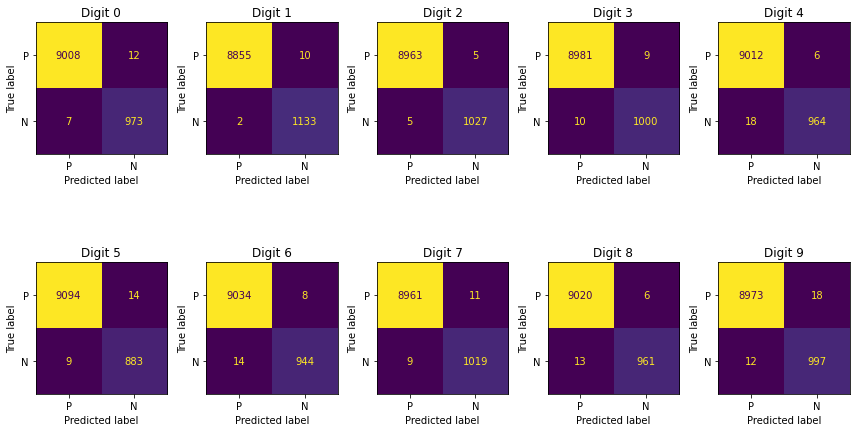

In [7]:
fig, ax = plt.subplots(2, 5, figsize=(12, 7))
    
for cm, axes, title in zip(cms, ax.flatten(), list(range(10))):
    axes.title.set_text(f'Digit {title}')
    sklearn.metrics.ConfusionMatrixDisplay(cm, display_labels=['P', 'N']).plot(ax=axes, colorbar=False)

fig.tight_layout()
plt.show()

#### Calculate basic performance metrics per class

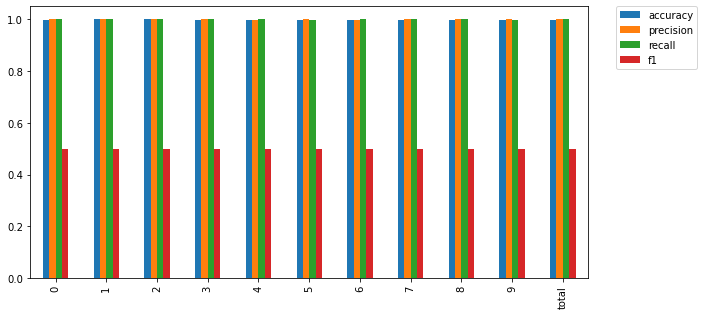

In [8]:
result = evaluation.getPerformanceMetrics(cms)
result.plot(kind='bar')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
plt.show()

#### Check learning progress based on the output file of the training notebook

In [10]:
if not os.path.exists(f'results/{training_file}'):
    print('ERROR missing training file! Try retraining to produce the needed file!')
else:
    model_training_log = pd.read_csv(f'results/{training_file}', index_col=0, usecols=[0,2,3,4,5,6])
    model_training_log.head()

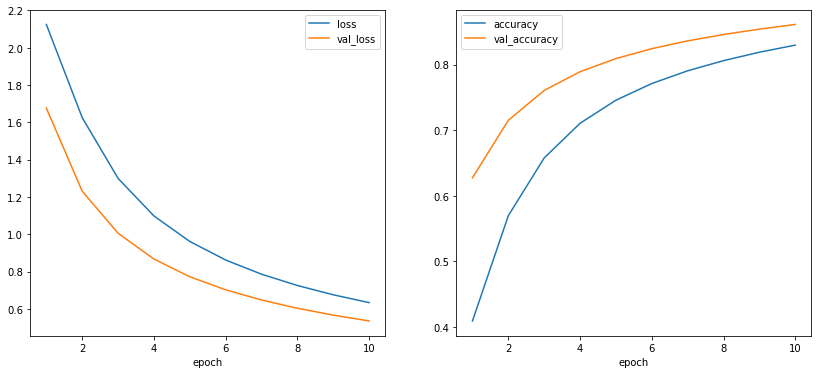

In [12]:
if not os.path.exists(f'results/{training_file}'):
    print('ERROR missing training file! Try retraining to produce the needed file!')
else:
    fig, axs = plt.subplots(1,2, figsize=(14,6))
    model_training_log.plot(x='epoch', y=['loss', 'val_loss'], ax=axs[0])
    model_training_log.plot(x='epoch', y=['accuracy', 'val_accuracy'], ax=axs[1])
    plt.show()

#### Validate accuracy on holdback dataset

In [13]:
evaluation.validate(model, F.cross_entropy, holdback_loader)


HoldBackSet: Avg. loss: 0.0000, Accuracy: 0.9901 (99.0%)

